**Importing Useful Libraries**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install mtcnn

     |████████████████████████████████| 2.3 MB 31.3 MB/s 


In [3]:
!pip install keras-facenet

  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10386 sha256=0be0cd5d4dd28cbfefa78688d910713243d353106be9902b095a4be5b5488a73
  Stored in directory: /root/.cache/pip/wheels/2b/76/1a/a29ceb07bfca098e2b0bc8690d550753a0384cbed26d5f47ee
Successfully built keras-facenet


In [4]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from PIL import Image 
from numpy import savez_compressed
from numpy import asarray
from os import listdir
from mtcnn.mtcnn import MTCNN
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

**Let's have a glance at the Dataset**

In [5]:
#loading train.csv
df = pd.read_csv('/content/drive/MyDrive/ES_FaceMatch_Dataset/train.csv')
#storing number of entries
n = df.shape[0]
print(n)
#having a glance at the last five rows in the dataset
df.tail()

23917


,image1,image2,label
23912,17620096105518.jpg,27185861803443.jpg,1
23913,54411024902913.jpg,54462918630631.jpg,0
23914,2441046188912.jpg,98569685833674.jpg,0
23915,79635236424472.jpg,19234963339416.jpg,1
23916,29150847849868.jpg,60050902308947.jpg,1


/content/drive/MyDrive/ES_FaceMatch_Dataset/dataset_images/79635236424472.jpg


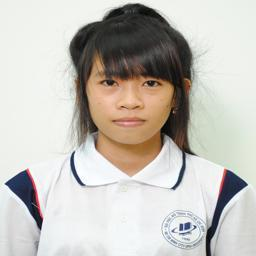

In [6]:
#opening a random image to have a glance at the dataset and verify connection
img1 = df['image1'][23915]
address = '/content/drive/MyDrive/ES_FaceMatch_Dataset/dataset_images/' + img1
print(address)
image1 = cv2.imread(address)
cv2_imshow(image1)

**Face Detection Using MTCNN**

In [7]:
def extract_image(image):
  """
  function to extract faces from the images using MTCNN
  """
  img1 = Image.open(image)            #open the image
  img1 = img1.convert('RGB')          #convert the image to RGB format 
  pixels = asarray(img1)              #convert the image to numpy array
  detector = MTCNN()                  #assign the MTCNN detector
  f = detector.detect_faces(pixels)
  #fetching the (x,y)co-ordinate and (width-->w, height-->h) of the image
  x1,y1,w,h = f[0]['box']             
  x1, y1 = abs(x1), abs(y1)
  x2 = abs(x1+w)
  y2 = abs(y1+h)
  #locate the co-ordinates of face in the image
  store_face = pixels[y1:y2,x1:x2]
  #plt.imshow(store_face)
  image1 = Image.fromarray(store_face,'RGB')    #convert the numpy array to object
  image1 = image1.resize((160,160))             #resize the image
  face_array = asarray(image1)                  #image to array
  return face_array

**Feature Extraction Using FaceNet**

In [8]:
from numpy import load
from numpy import asarray
from numpy import expand_dims
from numpy import savez_compressed
from numpy import reshape
from keras.models import load_model
from keras_facenet import FaceNet

In [10]:
"""
iterate through all the entries of the csv and go to each image; 
extract faces and embeddings and store the pair as a numpy array
"""
x_test = []
y_test = []
facenet = FaceNet()
for i in range(23900, n):
  # if i%50 == 0:
  #   print(i)
  try:
    img1 = df['image1'][i]
    address1 = '/content/drive/MyDrive/ES_FaceMatch_Dataset/dataset_images/' + img1
    face1 = extract_image(address1)
    face1 = np.reshape(face1, (1,160, 160,3))
    embed1 = facenet.embeddings(face1)
    img2 = df['image2'][i]
    address2 = '/content/drive/MyDrive/ES_FaceMatch_Dataset/dataset_images/' + img2
    face2 = extract_image(address2)
    face2 = np.reshape(face2, (1,160, 160,3))
    embed2 = facenet.embeddings(face2)
    pair = np.concatenate((embed1,embed2), axis=-1)
    x_test.append(pair)
    y_test.append(df['label'][i])
    if i%100 ==0:
      xarray= np.array(x_test)
      yarray = np.array(y_test)
      np.save('/content/drive/MyDrive/ES_Files/Xtrainlast.npy', xarray)
      np.save('/content/drive/MyDrive/ES_Files/Ytrainlast.npy', yarray)
  except:
    pass
    #print(i, str('NOT OK'))

xarray= np.array(x_test)
yarray = np.array(y_test)
np.save('/content/drive/MyDrive/ES_Files/Xtrainlast.npy', xarray)
np.save('/content/drive/MyDrive/ES_Files/Ytrainlast.npy', yarray)

**Feature CLassification Using Random Forest Classifier**

In [11]:
x1 = np.load('/content/drive/MyDrive/ES_Files/Xtrain10000.npy')
x3 = np.load('/content/drive/MyDrive/ES_Files/Xtrain5000to7500.npy')
x4 = np.load('/content/drive/MyDrive/ES_Files/Xtrain7500to10.npy')
x5 = np.load('/content/drive/MyDrive/ES_Files/Xtrain10to12500.npy')
x6 = np.load('/content/drive/MyDrive/ES_Files/Xtrain12500to15.npy')
x7 = np.load('/content/drive/MyDrive/ES_Files/Xtrain15to16.npy')
x8 = np.load('/content/drive/MyDrive/ES_Files/Xtrain17to18.npy')

In [12]:
y1 = np.load('/content/drive/MyDrive/ES_Files/Ytrain10000.npy')
y3 = np.load('/content/drive/MyDrive/ES_Files/Ytrain5000to7500.npy')
y4 = np.load('/content/drive/MyDrive/ES_Files/Ytrain7500to10.npy')
y5 = np.load('/content/drive/MyDrive/ES_Files/Ytrain10to12500.npy')
y6 = np.load('/content/drive/MyDrive/ES_Files/Ytrain12500to15.npy')
y7 = np.load('/content/drive/MyDrive/ES_Files/Ytrain15to16.npy')
y8 = np.load('/content/drive/MyDrive/ES_Files/Ytrain17to18.npy')

In [13]:
#fetching stored arrays which have embeddings of each image pairs
trainX = np.concatenate([x1, x3, x4, x5, x6, x7, x8], axis = 0)
trainY = np.concatenate([y1, y3, y4, y5, y6, y7, y8], axis = 0)
print(trainX.shape)
print(trainY.shape)

(14275, 1, 1024)
(14275,)


In [16]:
trainX = trainX.reshape([14275,1024])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [17]:
x_train, x_test, y_train, y_test = train_test_split(trainX, trainY, test_size=0.16)

In [20]:
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
# predictions
rfc_predict = rfc.predict(x_test)
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1460
           1       0.95      0.75      0.84       824

    accuracy                           0.90      2284
   macro avg       0.91      0.86      0.88      2284
weighted avg       0.90      0.90      0.89      2284



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 4)]
# number of features at every split
max_features = ['auto']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 4)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(x_train, y_train)
# print results
print(rfc_random.best_params_)

In [21]:
# random forest model creation with best parameters from randomized search
rfc = RandomForestClassifier(n_estimators = 500)
rfc.fit(x_train,y_train)
# predictions
rfc_predict = rfc.predict(x_test)
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1460
           1       0.96      0.79      0.87       824

    accuracy                           0.91      2284
   macro avg       0.93      0.89      0.90      2284
weighted avg       0.92      0.91      0.91      2284



**Storing the Feature Classification Model**

In [23]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(rfc, open(filename, 'wb'))